In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('PDF')
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from glob import glob
import ns
import history_cmc as hic
%matplotlib inline

twopi=2.*np.pi
yearsc=3.1557*10**7
figsave='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/plots/'

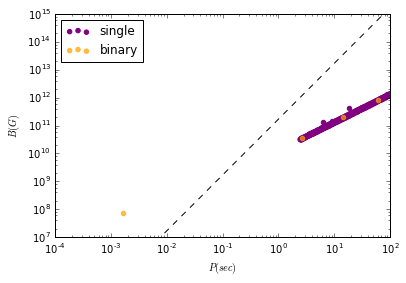

In [4]:
#Generate spin distribution and PP plot.
#dir8e5='/projects/b1011/syr904/cmc/cmc-mpi-06/rundir/8e5rv1fb5kick1.0'
#dir1e6='/projects/b1011/syr904/cmc/cmc-mpi-05/rundir/1.5e6rv1fb5kick1.0'
#sourcedir=dir1e6
sourcedir='/projects/b1011/carl/cmcSimulations/spinGRID/chi_0.0/rv1/rg8_z0.001/2e6'
#sourcedir='/projects/b1011/kyle/cmc/newruns/rundir/N8e5rv1fb5w5_kickgrid/kickscale_0.18'

pref='2e6_chi0.0_rv1_rg8_z0.001'
filestr=sourcedir+'/'+pref
snaps=np.sort(glob(filestr+'.snap*.dat.gz'))
lastsnap=snaps[-1]
Bs, Bb, Ps, Pb=ns.get_snap_BP(lastsnap)

#Death Line
x=np.logspace(-4.0, 2.0, num=50)

#Ps=np.asarray(sispin); Pb=np.asarray(bispin); Bs=np.asarray(Bs); Bb=np.asarray(Bb); Bsi=np.asarray(Bsi); Bbi=np.asarray(Bbi); Psi=np.asarray(Psi); Pbi=np.asarray(Pbi)
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(x, (x**2)*(0.17*10**12), 'k--')    #Deadline
#plt.plot(x, (4*10**8)*(x/(8.6*10**-4))**(7./6.), 'r--')
#plt.plot(x, x*0.07*10**12, 'b--')  #Artificial line
#plt.plot(x, x*0.15*10**12, 'g--')  #Artificial line
#plt.plot(x, x*0.04*10**12, 'r--')  #Artificial line
#plt.plot(x, 10**(1.81*np.log10(x)+6.9), 'k')   #Eq.(18)
#plt.plot(x, 10**(1.75*np.log10(x)-11.64), 'k.')   #Eq.(19)
#plt.scatter(Psi, Bsi, marker='.', color='k', label='15 Myr')
#plt.scatter(Pbi, Bbi, marker='.', color='k')
plt.scatter(Ps, Bs, color='purple', label='single')
plt.scatter(Pb, Bb, color='orange', label='binary', alpha=0.7)
plt.xlim(10**-4, 100.)
plt.ylim(10**7, 10**15)
plt.xlabel(r'$P(sec)$')
plt.ylabel(r'$B(G)$')
plt.legend(loc='upper left')

#plt.show()
#plt.savefig(figsave+'8e5kick1.pdf', dpi=300)

[ 404.  404.  404. ...,    2.    2.    2.]
[ 1.  1.  1. ...,  7.  7.  7.]


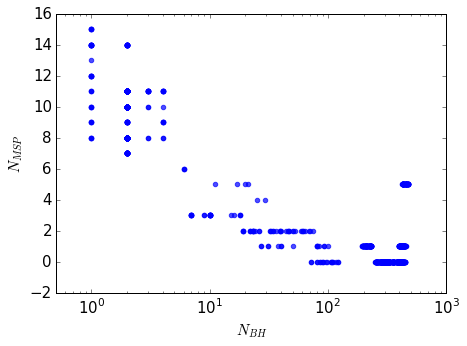

In [4]:
pd.options.display.max_rows = 4000
data=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/ns_number_10to12Gyr.dat')
nbh=np.array(data[:,0]); ntot=np.array(data[:,1]); nmsp=np.array(data[:,2])
print nbh
print nmsp

matplotlib.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
plt.scatter(nbh, nmsp, color='b', marker='o', s=20, alpha=0.7)

plt.xlim(0.5,10**3)
plt.xscale('log')
plt.xlabel(r'$N_{BH}$')
plt.ylabel(r'$N_{MSP}$')
#plt.show()
plt.savefig(figsave+'nbhnmsp_10to12Gyr.pdf', dpi=300)

729336 689053
382216 833021
602427 833410
424380 825413
522263 831695
467893 837101
602427 833410
802855 316469
703663 816385
733912 807845
484084 835323
484084 835323
703663 816385
700549 70293
484084 835323
156269 1223263
801829 179609
734749 -100
758752 -100
641481 1342769
138239 1012759
484084 835323
523114 149954
217394 -100
994514 1236208
244534 1185419
410442 1116787
119153 -100
973430 468730
274252 -100
1217740 694888
279982 752974
464601 1186539
120909 -100
1362190 -100
240676 894564
73016 407771
1054893 632229
58134 858760
1062948 -100
142206 -100
590707 1089864
585946 -100
897830 1013937
940630 620578
539605 -100
861638 -100
974797 844499
618382 60691
439412 1166651
857622 1332761
125924 110090
1496595 225017
212033 1087121
460517 1569592
426002 56473
505296 1007779
1037757 589733
85998 0
560956 90706
681272 -100
342981 -100
710320 1352405
1491428 841775
962597 725457
299045 763408
778283 673811


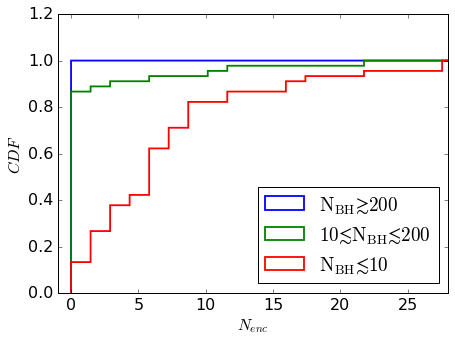

In [20]:
pathlist='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_path.dat'
start=0
end=24

sourcedir=np.genfromtxt(pathlist, dtype=str)
enc_bhpoor=[]; enc_bhrich=[]; enc_bhmid=[]
for i in range(start, end):
    pref='initial'
    filestr=sourcedir[i]+'/'+pref
    snaps=np.sort(glob(filestr+'.snap*.dat.gz'))
    lastsnap=snaps[-1]
    Npulsar, Nmsp, Nmtb, MSPid, Comid=ns.get_snap_Nns(lastsnap)
    
    for j in range(len(MSPid)):
        #print MSPid[j]
        history=hic.history_maker([MSPid[j]], [1], 'initial', sourcedir[i], 1.0)
        intact_num=len(history[MSPid[j]]['binint']['binint'])
        if i>18: enc_bhpoor.append(intact_num)
        elif i<11: enc_bhrich.append(intact_num)
        else: enc_bhmid.append(intact_num)
            
    #print i

#print len(enc_bhrich), len(enc_bhpoor), len(enc_bhmid)
enc_bhrich=np.pad(enc_bhrich, (0, 37), 'constant')
enc_bhmid=np.pad(enc_bhmid, (0, 31), 'constant')
#print len(enc_bhrich), len(enc_bhpoor), len(enc_bhmid)
weights_bhrich= np.ones_like(enc_bhrich)/float(len(enc_bhrich))
weights_bhpoor= np.ones_like(enc_bhpoor)/float(len(enc_bhpoor))
weights_bhmid= np.ones_like(enc_bhmid)/float(len(enc_bhmid))

matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
plt.hist(enc_bhrich, bins=40, histtype='step', lw=1.8, color='b', weights=weights_bhrich, cumulative=True, range=(0.0, max(enc_bhpoor)), label=r'$\rm{N_{BH} \gtrsim 200}$')
plt.hist(enc_bhmid, bins=40, histtype='step', lw=1.8, color='r', weights=weights_bhmid, cumulative=True, range=(0.0, max(enc_bhpoor)), label=r'$\rm{10 \lesssim N_{BH} \lesssim 200}$')
plt.hist(enc_bhpoor, bins=40, histtype='step', lw=1.8,color='orange', weights=weights_bhpoor, cumulative=True, range=(0.0, max(enc_bhpoor)), label=r'$\rm{N_{BH} \lesssim 10}$')
plt.ylim(0.0, 1.2)
plt.xlim(-1., 28.)
plt.ylabel(r'$CDF$')
plt.xlabel(r'$N_{enc}$')
plt.legend(loc='lower right')
#plt.show()
#plt.savefig('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/encounter_cdf.pdf', dpi=300)

#plt.figure()
#values_rich, base_rich = np.histogram(enc_bhrich)
#cumulative_rich = np.cumsum(values_rich)
#plt.plot(base_rich[:-1], cumulative_rich)
#values_mid, base_mid = np.histogram(enc_bhmid)
#cumulative_mid = np.cumsum(values_mid)
#plt.plot(base_mid[:-1], cumulative_mid)
#values_poor, base_poor = np.histogram(enc_bhpoor)
#cumulative_poor = np.cumsum(values_poor)
#plt.plot(base_poor[:-1], cumulative_poor)
#plt.ylim(0.0, 1.2)
#plt.ylabel(r'$Probability Density$')
#plt.xlabel(r'$N_{encounter}$')
#plt.legend(loc='upper right')
##plt.show()
plt.savefig(figsave+'encounter_cdf_alter.pdf', dpi=300)



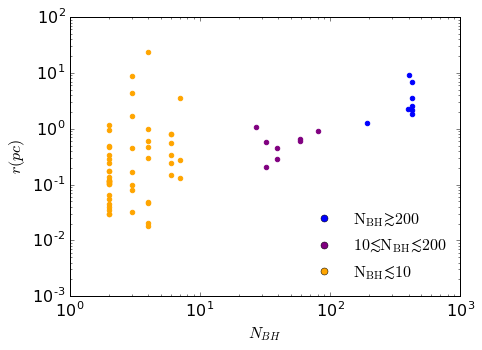

In [56]:
sourcedir='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_msp.dat'
data=np.genfromtxt(sourcedir)
model=data[:,0]; R=np.array(data[:,3]); RC=np.array(data[:,6]); NBH=np.array(data[:,7]); NTOT=np.array(data[:,8])
R2D=data[:,9]
#print R2D

matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]

bdot = mlines.Line2D([], [],  linestyle = 'None', color='blue', marker='o',
                  markersize=7, label=r'$\rm{N_{BH} \gtrsim 200}$')
pdot=mlines.Line2D([], [],  linestyle = 'None', color='purple', marker='o',
                  markersize=7, label=r'$\rm{10 \lesssim N_{BH} \lesssim 200}$')
odot=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='o',
                  markersize=7, label=r'$\rm{N_{BH} \lesssim 10}$')

##3D radius plot
#plt.figure()
#for i in range(len(model)):
#    if model[i]<11:
#        plt.scatter(np.log(NBH[i]), np.log(R[i]), color='b', s=20)
#    elif model[i]<=18:
#        plt.scatter(np.log(NBH[i]), np.log(R[i]), color='purple', s=20)
#    else:
#        plt.scatter(np.log(NBH[i]), np.log(R[i]), color='orange', s=20)
#
#plt.xlabel(r'$N_{BH}$')
#plt.ylabel(r'$r(pc)$')
#plt.title('3D Radius')
#plt.legend(handles=[bdot, pdot, odot], loc='lower right', prop={'size': 12}, numpoints=1, frameon=False)
#plt.show()

##2D radius plot
plt.figure()
for i in range(len(model)):
    if model[i]<11:
        plt.scatter(NBH[i], R2D[i], color='b', s=20)
    elif model[i]<18:
        plt.scatter(NBH[i], R2D[i], color='purple', s=20)
    else:
        plt.scatter(NBH[i], R2D[i], color='orange', s=20)

plt.xlabel(r'$N_{BH}$')
plt.ylabel(r'$r(pc)$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
#plt.title('Distribution of MSP - 2D Radius')
plt.legend(handles=[bdot, pdot, odot], loc='lower right', prop={'size': 16}, numpoints=1, frameon=False)
#plt.show()
plt.savefig(figsave+'radius.pdf', dpi=300)

In [2]:
pathlist='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_path.dat'
msplist='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_msp.dat'
start=0
end=24
    
    
Rbh_mean, Rns_mean, Rmsp_mean, Dbh, Dbh_mean=ns.get_mean2Dradius_allmodels(pathlist, msplist, start, end)
Rbh3D_mean, Dbh3D, Dbh3D_mean=ns.get_mean3Dradius_allmodels(pathlist, start, end)

data=np.genfromtxt(msplist)
model=data[:,0]; R2D=data[:,9]

/software/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/software/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


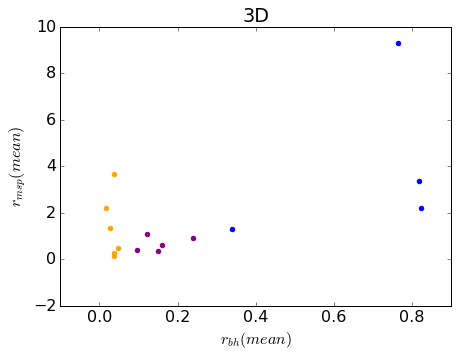

In [30]:
matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]

plt.figure()
for j in range(24):
    if j<11:plt.scatter(Rbh3D_mean[j], Rmsp_mean[j], color='b')
    elif j<18: plt.scatter(Rbh3D_mean[j], Rmsp_mean[j], color='purple')
    else: plt.scatter(Rbh3D_mean[j], Rmsp_mean[j], color='orange')

plt.xlabel(r'$r_{bh}(mean)$')
plt.ylabel(r'$r_{msp}(mean)$')
#plt.xscale('log')
plt.title('3D')
plt.show()

5112 2580 3773
8 45 14
52.2668 51.509 50.4232


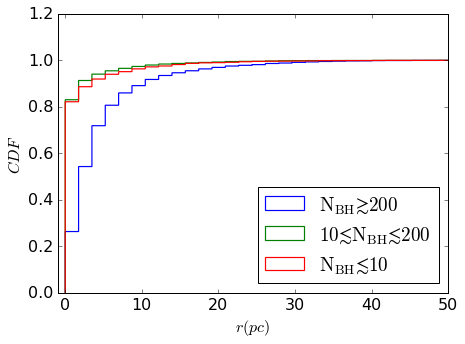

In [19]:
pathlist='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_path.dat'
msplist='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_msp.dat'
start=0
end=24

sourcedir=np.genfromtxt(pathlist, dtype=str)
datamsp=np.genfromtxt(msplist)
model=datamsp[:,0]; nsid=datamsp[:,1]; rmsp=datamsp[:,9]

rns_bhpoor=[]; rns_bhmid=[]; rns_bhrich=[]
rmsp_bhpoor=[]; rmsp_bhmid=[]; rmsp_bhrich=[]

for i in range(start, end):
    #print i
    pref='initial'
    filepath=sourcedir[i]
    filestr=filepath+'/'+pref
    projs=np.sort(glob(filestr+'.snap*.2Dproj.dat'))
    observs=np.sort(glob(filestr+'.snap*.obs_params.dat'))
    lastproj=projs[-1]
    lastobs=observs[-1]

    mspids=[]
    for j in range(len(model)):
        if int(model[j])==i:
            mspids.append(int(nsid[j]))

    Rbh, Rns, Rmsp, Mbh, Mns, Mmsp, Rc, Rhl=ns.get_2Dradius(lastproj, lastobs, mspids)
    
    if i>18: rns_bhpoor=rns_bhpoor+Rns
    elif i<11: rns_bhrich=rns_bhrich+Rns
    else: rns_bhmid=rns_bhmid+Rns
        

for k in range(len(model)):
    if model[k]>18: rmsp_bhpoor.append(rmsp[k])
    elif model[k]<11: rmsp_bhrich.append(rmsp[k])
    else: rmsp_bhmid.append(rmsp[k])
        
print len(rns_bhrich), len(rns_bhpoor), len(rns_bhmid)
print len(rmsp_bhrich), len(rmsp_bhpoor), len(rmsp_bhmid)

rns_bhrpoor=np.pad(rns_bhpoor, (0, 2532), 'constant')
rns_bhmid=np.pad(rns_bhmid, (0, 1339), 'constant')
rmsp_bhrich=np.pad(rmsp_bhrich, (0, 5104), 'constant')
rmsp_bhpoor=np.pad(rmsp_bhpoor, (0, 5074), 'constant')
rmsp_bhmid=np.pad(rmsp_bhmid, (0, 5098), 'constant')

print np.max(rns_bhrich), np.max(rns_bhpoor), np.max(rns_bhmid)
weights_ns_bhrich= np.ones_like(rns_bhrich)/float(len(rns_bhrich))
weights_ns_bhpoor= np.ones_like(rns_bhpoor)/float(len(rns_bhpoor))
weights_ns_bhmid= np.ones_like(rns_bhmid)/float(len(rns_bhmid))
weights_msp_bhrich= np.ones_like(rmsp_bhrich)/float(len(rmsp_bhrich))
weights_msp_bhpoor= np.ones_like(rmsp_bhpoor)/float(len(rmsp_bhpoor))
weights_msp_bhmid= np.ones_like(rmsp_bhmid)/float(len(rmsp_bhmid))

matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
plt.hist(rns_bhrich, bins=30, histtype='step', lw=1.2, weights=weights_ns_bhrich, cumulative=True, range=(0.0, max(rns_bhrich)), label=r'$\rm{N_{BH} \gtrsim 200}$')
plt.hist(rns_bhmid, bins=30, histtype='step', lw=1.2, weights=weights_ns_bhmid, cumulative=True, range=(0.0, max(rns_bhrich)), label=r'$\rm{10 \lesssim N_{BH} \lesssim 200}$')
plt.hist(rns_bhpoor, bins=30, histtype='step', lw=1.2, weights=weights_ns_bhpoor, cumulative=True, range=(0.0, max(rns_bhrich)), label=r'$\rm{N_{BH} \lesssim 10}$')
#plt.hist(rmsp_bhrich, bins=100, histtype='step', lw=1.2, weights=weights_msp_bhrich, cumulative=True, range=(0.0, max(rmsp_bhpoor)), label=r'$\rm{N_{BH} \gtrsim 200}$')
#plt.hist(rmsp_bhmid, bins=100, histtype='step', lw=1.2, weights=weights_msp_bhmid, cumulative=True, range=(0.0, max(rmsp_bhpoor)), label=r'$\rm{10 \lesssim N_{BH} \lesssim 200}$')
#plt.hist(rmsp_bhpoor, bins=100, histtype='step', lw=1.2, weights=weights_msp_bhpoor, cumulative=True, range=(0.0, max(rmsp_bhpoor)), label=r'$\rm{N_{BH} \lesssim 10}$')


#plt.ylim(0.0, 1.2)
plt.xlim(-1., 50.)
plt.ylabel(r'$CDF$')
plt.xlabel(r'$r(pc)$')
plt.legend(loc='lower right')
plt.show()

(0.0002, 2.0)

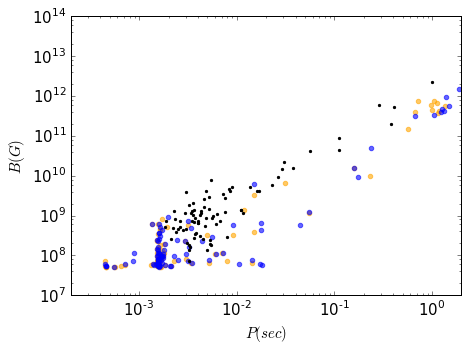

In [4]:
##Plot B-P of MSPs from models on top of observed data
datamsp=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_msp.dat')
datapsr=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_normalpsr.dat')
datamsp10=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_msp10Gyr.dat')
datapsr10=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_normalpsr_10Gyr.dat')

B=datamsp[:,4]; P=datamsp[:,5]
Bpsr=datapsr[:,1]; Ppsr=datapsr[:,2]
B10=datamsp10[:,4]; P10=datamsp10[:,5]
Bpsr10=datapsr10[:,2]; Ppsr10=datapsr10[:,3]

Ps, Pb, Bs, Bb=ns.readdata_freire() #P in ms, B in G

#Death Line
x=np.logspace(-2.0, 2.0, num=50)

matplotlib.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
#plt.plot(x, (x**2)*(0.17*10**12), 'k--')    #Deadline
plt.scatter(P, B, color='orange', s=20, alpha=0.6)
plt.scatter(P10, B10, color='b', s=20, alpha=0.6)
plt.scatter(Ppsr, Bpsr, color='orange', s=20, alpha=0.6)
plt.scatter(Ppsr10, Bpsr10, color='b', s=20, alpha=0.6)
plt.scatter(Ps*0.001, Bs, c='k', marker='.')
plt.scatter(Pb*0.001, Bb, c='k', marker='.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$P(sec)$')
plt.ylabel(r'$B(G)$')
plt.xlim(0.0002, 2.)
#plt.show()
#plt.savefig(figsave+'ppdot.pdf', dpi=300)

['/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/history/MSP/23/BP/299045.dat', '/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/history/MSP/23/BP/962597.dat', '/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/history/MSP/23/BP/560956.dat', '/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/history/MSP/23/BP/778283.dat', '/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/history/MSP/23/BP/710320.dat', '/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/history/MSP/23/BP/1491428.dat', '/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/history/MSP/23/BP/681272.dat', '/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/history/MSP/23/BP/342981.dat']
[3309.8377168433] ['BS']


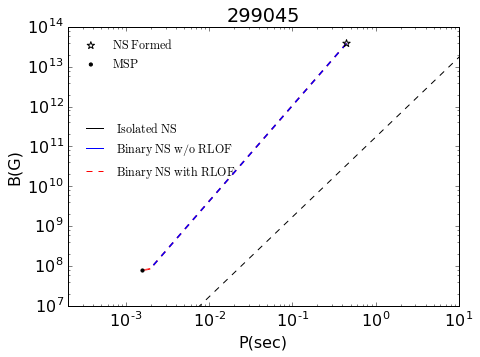

[] []


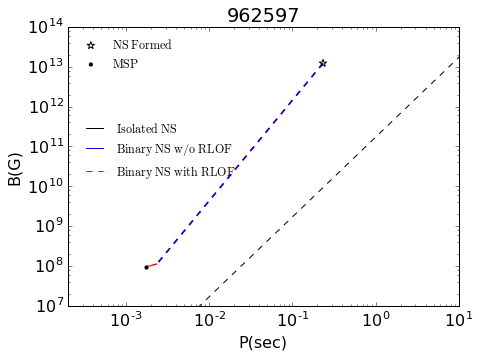

[5338.417746152099, 5412.1661986672, 5549.9393072381, 5667.0410192174, 5713.093151268199, 5772.7016686298, 5919.304012776, 6176.7873315412, 6295.193292628, 6594.490866476] ['BS', 'BS', 'BS', 'BS', 'BS', 'BB', 'BB', 'BS', 'BS', 'BB']


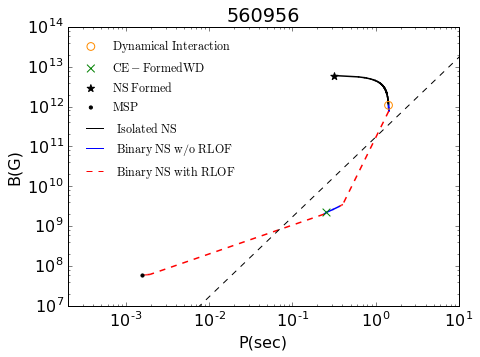

[3498.6918588861995, 6015.3416664412, 6062.6604745119, 6155.0015217628, 6180.6863046157, 6195.8226535648, 6398.921855056699] ['BS', 'BS', 'BB', 'BS', 'BS', 'BS', 'BS']


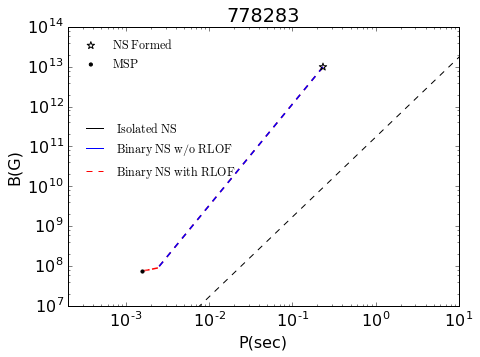

[4222.8895531073995, 4699.5380310064] ['BS', 'BS']


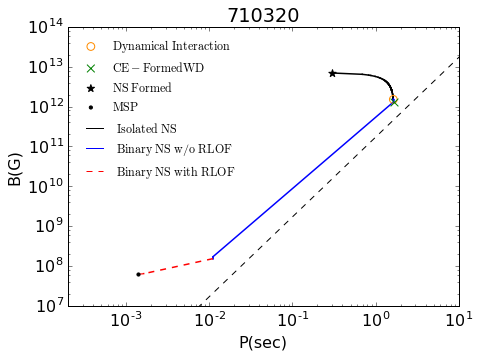

[5907.5728875033, 5908.8850950651995, 5910.643167382499, 5915.212487193, 5916.2014781994, 5918.6057731878, 6177.1268858853, 6244.2758857437] ['BB', 'BS', 'BS', 'BB', 'BS', 'BB', 'BB', 'BB']


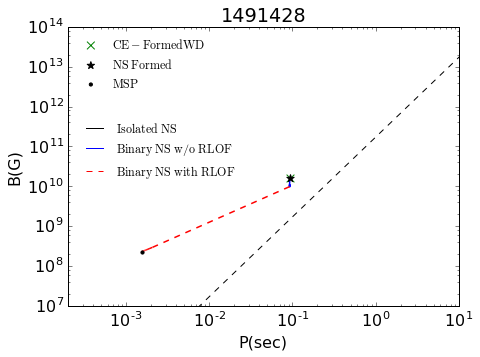

[5905.9120766815995, 5906.2003984755, 5911.9022866969, 5932.967416341399, 5946.2076826606, 5965.786169197, 5967.6229077751, 5967.881921030199, 5968.459119414099, 5970.5963470384995, 7226.2223782293995, 8529.554331252499, 8593.2814061588, 8622.2483818702, 8695.645457145, 8965.8068807329, 9160.318756879999, 9190.041192701501, 9233.1972891103, 9491.8927225686, 9548.9801507973, 9576.181038344299, 9782.268046405501] ['BS', 'BS', 'BS', 'BS', 'BS', 'BS', 'BS', 'BS', 'BS', 'BS', 'BS', 'BS', 'BB', 'BS', 'BS', 'BS', 'BB', 'BS', 'BS', 'BS', 'BB', 'BS', 'BS']


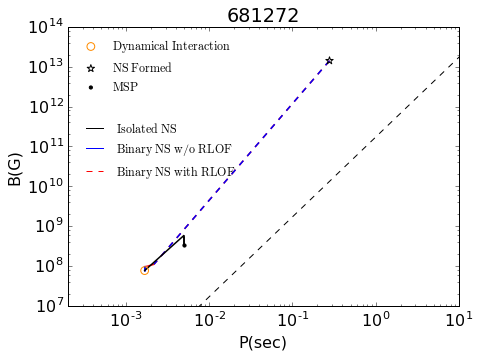

[9035.429104212399, 10261.8417919617, 10322.3559278675, 10367.3693477028, 10371.6030350037, 10392.9047373576, 10397.615625828099, 10508.8732304754, 10517.5208755479, 10521.1340903691, 10522.4927477562, 10532.7175059629, 10535.6054492342, 10556.717526107299, 10575.407191029699, 10586.9334434943, 10603.547310112199] ['BS', 'BS', 'BS', 'BS', 'BS', 'BS', 'BS', 'BB', 'BS', 'BS', 'BS', 'BS', 'BS', 'BB', 'BS', 'BS', 'BS']


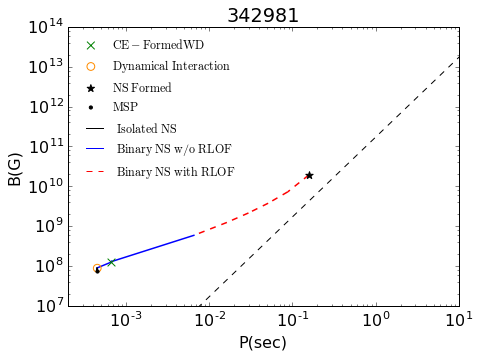

In [13]:
##Plot evolution of B-P
sourcedir='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/history/MSP/23/BP'
idfile=glob(sourcedir+'/'+'*.dat')
print idfile
dl=np.logspace(-3.8, 1.4, num=50)
for i in range(len(idfile)):
    dataid=np.genfromtxt(idfile[i])
    B=dataid[:,1]; P=dataid[:,2]; FC=dataid[:,3]; k1=dataid[:, 9]; t=dataid[:,0]; radrol1=dataid[:, 11]
    labels=idfile[i].replace(sourcedir+'/', '')
    idstr=labels.replace('.dat', '')
    theid=int(idstr)
    
    if FC[0]!=-100: formation=FC[0]
    if FC[-1]!=-100: formation=FC[-1]
    
    check=0
    if B[0]<10**10:
        while (check<1):
            ##Initialize Spin
            u1=np.random.random_sample()
            u2=np.random.random_sample()
            s=np.sqrt(-2.*np.log(1.-u1))*np.cos(twopi*u2)
            s=0.7*s-0.6
            if -1.5<s and s<0.013:
                p0=10.**s
        
            ##Initialize B-field
            u1=np.random.random_sample()
            u2=np.random.random_sample()
            s=np.sqrt(-2.*np.log(1.-u1))*np.cos(twopi*u2)
            s=0.68*s+12.6
            if 11.5<=s and s<=13.8:
                b0=10.**s
            
            if p0!=0 and b0!=0:
                P=np.insert(P, 0, p0); B=np.insert(B, 0, b0); k1=np.insert(k1, 0, -1)
                check=1
    
    time, types=ns.get_interact_t_type(theid, 'initial', '/projects/b1011/sourav/new_runs/kick_grid/rv1/kickscale_1.0')
    print time, types
    
    matplotlib.rcParams.update({'font.size': 16})
    plt.rcParams['figure.figsize'] = [7, 5]
    plt.figure()
    plt.plot(dl, (dl**2)*(0.17*10**12), 'k--', lw=1.0)    #Deathline
    for j in range(len(t)-1):
        x=P[j:j+2]; y=B[j:j+2]
        if k1[j+1]==-100:
            plt.plot(x, y, lw=1.5, color='k', zorder=1)
        else: 
            if radrol1[j+1]<=1:
                plt.plot(x, y, lw=1.5, color='b', zorder=1)
            else:
                plt.plot(x, y, lw=1.5, ls='--', color='r', zorder=1)
                if check==1:
                    if j==0:
                        plt.plot(x, y, lw=1.5, ls='--', color='b', zorder=1)
            
        if (k1[j]==-100 and k1[j+1]>-100):
            plt.scatter(P[j], B[j], facecolors='none', edgecolors='darkorange', s=60, label=r'$\rm{Dynamical\ Interaction}$', zorder=2)
        if  (k1[j+1]==-100 and k1[j]>-100):
            plt.scatter(P[j], B[j], facecolors='none', edgecolors='darkorange', s=60, label=r'$\rm{Dynamical\ Interaction}$', zorder=2)
        if (k1[j]>=0 and k1[j]<10) and k1[j+1]>=10:
            plt.scatter(P[j], B[j], marker='x', color='g', s=60, label=r'$\rm{CE-Formed WD}$', zorder=2)
            
    if check==0: 
        plt.scatter(P[0], B[0], marker='*', s=60, color='k', label=r'$\rm{NS\ Formed}$', zorder=2)
    else:
        plt.scatter(P[0], B[0], marker='*', s=60, color='k', facecolors='none', label=r'$\rm{NS\ Formed}$', zorder=2)
    
    kline = mlines.Line2D([], [], color='k', label=r'$\rm{Isolated\ NS}$')
    bline = mlines.Line2D([], [], color='b', label=r'$\rm{Binary\ NS\ w/o\ RLOF}$')
    rline = mlines.Line2D([], [], color='r', ls='--', label=r'$\rm{Binary\ NS\ with\ RLOF}$')
    plt.scatter(P[-1], B[-1], marker='.', s=40, color='k', label=r'$\rm{MSP}$', zorder=2)
    plt.xlabel('P(sec)')
    plt.ylabel('B(G)')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.0002, 10)
    plt.ylim(10**7, 10**14)
    legend1=plt.legend(loc='upper left', prop={'size': 12}, scatterpoints=1, frameon=False)
    plt.gca().add_artist(legend1)
    plt.legend(handles=[kline, bline, rline], loc='upper left', bbox_to_anchor=(0.01, 0.7), prop={'size': 12}, frameon=False)
    plt.title(idstr)
    plt.show()
    #plt.savefig('/projects/b1011/syr904/projects/PULSAR/bse_change/history_kconst/'+labels+'_BP.pdf')